# Model to predict sentiment

Objective is to extract, process and analyze data from the main social networks.

### Data:
The data set has 114,265 messages previously tagged extracted from the main social networks 
in order to assess the sentiment of each one of them. It is labeled as follows:
     - zero (0) if the comment is positive.
     - one (1) if the comment is negative.


### Target:
In this exercise they will have to develop a suitable model of binary classification of machine
learning or deep learning (Tensorflow is recommended), to predict the sentiment of a text.
For this, a notebook must be created that contains the step by step of the construction of the model
selected described as follows:

1. Data extraction and processing:
     - Separate training and test data.
     - Remove special characters from the text.
2. Model architecture.
3. Training.
4. Test.
5. Storage of the model as a function for its application in other texts. 

# Libraries

In [62]:
import numpy as np
import pandas as pd
import re
import tensorflow 
import keras
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle

from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GRU
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ALEJANDRO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load dataset

In [2]:
df = pd.read_csv('data.csv')
df.head(10)

,text,sentimiento_real
0,@Vladi_VillegasP @YouTube @laidygomezf una co...,0
1,@Vladialacarta @laidygomezf yo estoy Orgullos...,0
2,"#SoyComunicadorClap \n#Táchira: \n""Hasta el ir...",0
3,"@VTVcanal8 La ""Reina del Tachira"" Protectora y...",0
4,Un buen espaldarazo a la institucionalidad ser...,0
5,Pa'lante mi gobernadora y líder del Táchira! 🏳...,0
6,#25Ago | El Cambio y Gobernadora de #Táchira a...,0
7,SENIAT_Oficial: #AlMomento Funcionarios @Senia...,0
8,#5Sep 🇻🇪🇨🇴 Respecto a la reactivación de las p...,0
9,@SENIAT_Oficial #EnDesarrollo Funcionarios de ...,0


# target variable

In [3]:
df['sentimiento_real'].describe()

count    114265.000000
mean          0.598932
std           0.490117
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: sentimiento_real, dtype: float64

In [4]:
df['sentimiento_real'].value_counts()

1    68437
0    45828
Name: sentimiento_real, dtype: int64

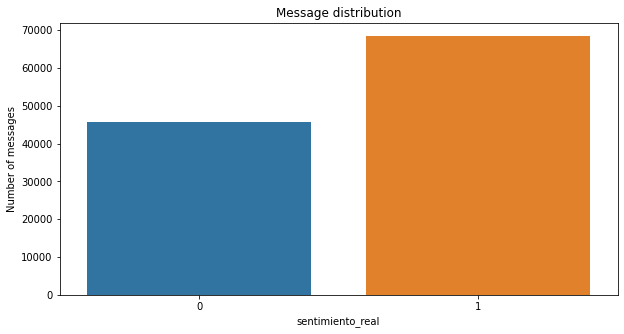

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(x="sentimiento_real", data=df)
plt.title("Message distribution")
plt.ylabel("Number of messages")
plt.show()

# Data processing

## Remove accents

In [6]:
a,b = 'áéíóúüñÁÉÍÓÚÜ','aeiouunAEIOUU'
trans = str.maketrans(a,b)

In [7]:
df['text'] = df['text'].str.translate(trans)
df.head(10)

,text,sentimiento_real
0,@Vladi_VillegasP @YouTube @laidygomezf una co...,0
1,@Vladialacarta @laidygomezf yo estoy Orgullos...,0
2,"#SoyComunicadorClap \n#Tachira: \n""Hasta el ir...",0
3,"@VTVcanal8 La ""Reina del Tachira"" Protectora y...",0
4,Un buen espaldarazo a la institucionalidad ser...,0
5,Pa'lante mi gobernadora y lider del Tachira! 🏳...,0
6,#25Ago | El Cambio y Gobernadora de #Tachira a...,0
7,SENIAT_Oficial: #AlMomento Funcionarios @Senia...,0
8,#5Sep 🇻🇪🇨🇴 Respecto a la reactivacion de las p...,0
9,@SENIAT_Oficial #EnDesarrollo Funcionarios de ...,0


## Remove tabs and line breaks

In [8]:
df['text'] = df['text'].str.replace("[\n,\t]", ' ', regex=True)
df.head(10)

,text,sentimiento_real
0,@Vladi_VillegasP @YouTube @laidygomezf una co...,0
1,@Vladialacarta @laidygomezf yo estoy Orgullos...,0
2,"#SoyComunicadorClap #Tachira: ""Hasta el irre...",0
3,"@VTVcanal8 La ""Reina del Tachira"" Protectora y...",0
4,Un buen espaldarazo a la institucionalidad ser...,0
5,Pa'lante mi gobernadora y lider del Tachira! 🏳...,0
6,#25Ago | El Cambio y Gobernadora de #Tachira a...,0
7,SENIAT_Oficial: #AlMomento Funcionarios @Senia...,0
8,#5Sep 🇻🇪🇨🇴 Respecto a la reactivacion de las p...,0
9,@SENIAT_Oficial #EnDesarrollo Funcionarios de ...,0


## Remove tags, links and numbers

In [9]:
df["text"] = df["text"].str.replace("(@[A-Za-z0-9\_\-\.]+)|(\w+:\/\/\S+)|(\d+[\w+\-\/]*)|(www\.\S+)", "", regex=True) 
df.head(10)

,text,sentimiento_real
0,una combinacion perfecta entre belleza e i...,0
1,yo estoy Orgulloso de usted gran mujer y ej...,0
2,"#SoyComunicadorClap #Tachira: ""Hasta el irre...",0
3,"La ""Reina del Tachira"" Protectora y proxima G...",0
4,Un buen espaldarazo a la institucionalidad ser...,0
5,Pa'lante mi gobernadora y lider del Tachira! 🏳...,0
6,# | El Cambio y Gobernadora de #Tachira atiend...,0
7,SENIAT_Oficial: #AlMomento Funcionarios reali...,0
8,# 🇻🇪🇨🇴 Respecto a la reactivacion de las plata...,0
9,#EnDesarrollo Funcionarios de culminan Opera...,0


## Remove Special Characters

In [10]:
df["text"] = df["text"].str.replace("[#,&,$,!,',),(,-,*,;,:,|,\",.,?,¿,¡]",'',regex=True)
df.head(10)

,text,sentimiento_real
0,una combinacion perfecta entre belleza e i...,0
1,yo estoy Orgulloso de usted gran mujer y ej...,0
2,SoyComunicadorClap Tachira Hasta el irrespon...,0
3,La Reina del Tachira Protectora y proxima Gob...,0
4,Un buen espaldarazo a la institucionalidad ser...,0
5,Palante mi gobernadora y lider del Tachira 🏳️🏳...,0
6,El Cambio y Gobernadora de Tachira atienden ...,0
7,SENIAT_Oficial AlMomento Funcionarios realiza...,0
8,🇻🇪🇨🇴 Respecto a la reactivacion de las plataf...,0
9,EnDesarrollo Funcionarios de culminan Operat...,0


## Remove emojis

In [11]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols and pictograms
        u"\U0001F680-\U0001F6FF"  # transport and map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese symbols
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [12]:
df["text"] = df["text"].apply(remove_emojis)
df.head(10)

,text,sentimiento_real
0,una combinacion perfecta entre belleza e i...,0
1,yo estoy Orgulloso de usted gran mujer y ej...,0
2,SoyComunicadorClap Tachira Hasta el irrespon...,0
3,La Reina del Tachira Protectora y proxima Gob...,0
4,Un buen espaldarazo a la institucionalidad ser...,0
5,Palante mi gobernadora y lider del Tachira ️️️,0
6,El Cambio y Gobernadora de Tachira atienden ...,0
7,SENIAT_Oficial AlMomento Funcionarios realiza...,0
8,Respecto a la reactivacion de las plataforma...,0
9,EnDesarrollo Funcionarios de culminan Operat...,0


## Remove leading and trailing spaces

In [13]:
df["text"] = df["text"].str.strip()
df.head(10)

,text,sentimiento_real
0,una combinacion perfecta entre belleza e intel...,0
1,yo estoy Orgulloso de usted gran mujer y ejemp...,0
2,SoyComunicadorClap Tachira Hasta el irrespon...,0
3,La Reina del Tachira Protectora y proxima Gobe...,0
4,Un buen espaldarazo a la institucionalidad ser...,0
5,Palante mi gobernadora y lider del Tachira ️️️,0
6,El Cambio y Gobernadora de Tachira atienden co...,0
7,SENIAT_Oficial AlMomento Funcionarios realiza...,0
8,Respecto a la reactivacion de las plataformas ...,0
9,EnDesarrollo Funcionarios de culminan Operati...,0


## Transform to lowercase

In [14]:
df["text"] = df["text"].str.lower()
df.head(10)

,text,sentimiento_real
0,una combinacion perfecta entre belleza e intel...,0
1,yo estoy orgulloso de usted gran mujer y ejemp...,0
2,soycomunicadorclap tachira hasta el irrespon...,0
3,la reina del tachira protectora y proxima gobe...,0
4,un buen espaldarazo a la institucionalidad ser...,0
5,palante mi gobernadora y lider del tachira ️️️,0
6,el cambio y gobernadora de tachira atienden co...,0
7,seniat_oficial almomento funcionarios realiza...,0
8,respecto a la reactivacion de las plataformas ...,0
9,endesarrollo funcionarios de culminan operati...,0


## Remove duplicates

In [15]:
df[df.duplicated(["text"])]

,text,sentimiento_real
14,endesarrollo funcionarios de culminan operati...,0
18,funcionarios de realizan operativo de verific...,0
25,frontera del tachira con cucuta cerca de posib...,0
27,frontera del tachira con cucuta cerca de posib...,0
28,frontera del tachira con cucuta cerca de posib...,0
...,...,...
114192,mardito banco de ladrones a las perdonas que ...,1
114207,ladrones,1
114238,mardito banco de ladrones a las perdonas que ...,1
114239,mardito banco de ladrones a las perdonas que ...,1


In [16]:
df[df.duplicated(["text", "sentimiento_real"])]

,text,sentimiento_real
14,endesarrollo funcionarios de culminan operati...,0
18,funcionarios de realizan operativo de verific...,0
25,frontera del tachira con cucuta cerca de posib...,0
27,frontera del tachira con cucuta cerca de posib...,0
28,frontera del tachira con cucuta cerca de posib...,0
...,...,...
114192,mardito banco de ladrones a las perdonas que ...,1
114207,ladrones,1
114238,mardito banco de ladrones a las perdonas que ...,1
114239,mardito banco de ladrones a las perdonas que ...,1


#### Duplicates are first removed where both variables are equal

In [17]:
df = df[~df.duplicated(["text", "sentimiento_real"])]
df

,text,sentimiento_real
0,una combinacion perfecta entre belleza e intel...,0
1,yo estoy orgulloso de usted gran mujer y ejemp...,0
2,soycomunicadorclap tachira hasta el irrespon...,0
3,la reina del tachira protectora y proxima gobe...,0
4,un buen espaldarazo a la institucionalidad ser...,0
...,...,...
114259,tambien fui afectada con el robo que nos hizo ...,1
114260,estoy intentando hacer un reclamo desde eldia ...,1
114261,aja y el dia de los muertos lo agarraran de pu...,1
114262,tengo problemas con la lectura de huella deseo...,1


In [18]:
df[df.duplicated(["text"],keep=False)]

,text,sentimiento_real
6,el cambio y gobernadora de tachira atienden co...,0
68,ddhh rolandcarreno,0
127,,0
153,excelente,0
168,tachira libre de drogas efectivos de servicio...,0
...,...,...
108184,y donde pueden comprar los comerciantes dolare...,1
108345,aqui en guacara y san joaquin carabobo no se r...,1
108649,en san diego eso carabobo muchos comerciante...,1
109002,que descanse en paz,1


#### We remove the duplicates considering only the text variable

In [19]:
# Removemos los duplicados considerando solo la variable text
df = df[~df.duplicated(["text"], keep=False)]
df

,text,sentimiento_real
0,una combinacion perfecta entre belleza e intel...,0
1,yo estoy orgulloso de usted gran mujer y ejemp...,0
2,soycomunicadorclap tachira hasta el irrespon...,0
3,la reina del tachira protectora y proxima gobe...,0
4,un buen espaldarazo a la institucionalidad ser...,0
...,...,...
114259,tambien fui afectada con el robo que nos hizo ...,1
114260,estoy intentando hacer un reclamo desde eldia ...,1
114261,aja y el dia de los muertos lo agarraran de pu...,1
114262,tengo problemas con la lectura de huella deseo...,1


## Remove stopwords

In [20]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

#### Remove accents from stopwords

In [21]:
stop_words = ' '.join(stopwords.words('spanish')).translate(trans).split(' ')
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'mas', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'si', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'tambien', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mi', 'antes', 'algunos', 'que', 'unos', 'yo', 'otro', 'otras', 'otra', 'el', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tu', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mio', 'mia', 'mios', 'mias', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estas', 'esta', 'estamos', 'estais', 'estan', 'e

#### Save file with StopWords

In [22]:
with open("stopwords.pickle", "wb") as f:
    pickle.dump(stop_words, f)

In [23]:
def tokenizar_stopwords(text, *stop_words):
    """Remove words considered stopwords in the text
    
    args: 
    ----------
        text (str): sentence to remove the stopwords
        stopwords (list): stopword list
    
    return:
    ----------
        (str): sentence without the stopwords
    """
    
    tokens = text.split()
    output = [word for word in tokens if word not in stop_words]
    
    return ' '.join(output)

#### The function is applied to the text variable of the dataframe

In [24]:
df["text"] = df["text"].apply(tokenizar_stopwords, args=stop_words)
df.head(10)

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_11444\716834467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].apply(tokenizar_stopwords, args=stop_words)


,text,sentimiento_real
0,combinacion perfecta belleza inteligencia gobe...,0
1,orgulloso usted gran mujer ejemplo gobernadora...,0
2,soycomunicadorclap tachira irresponsable san c...,0
3,reina tachira protectora proxima gobernadora,0
4,buen espaldarazo institucionalidad gobierno co...,0
5,palante gobernadora lider tachira ️️️,0
7,seniat_oficial almomento funcionarios realizan...,0
8,respecto reactivacion plataformas aduaneras pa...,0
9,endesarrollo funcionarios culminan operativo s...,0
10,seniat_oficial endesarrollo funcionarios culmi...,0


## Remove observations with empty cells

In [25]:
df[df["text"] == ""]

,text,sentimiento_real
10552,,0
24069,,0
29029,,0
29168,,0
31717,,0
33146,,0
33211,,0
42424,,0
54755,,1
54876,,1


In [26]:
df['text'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['text'])
df[df["text"] == ""]

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_11444\4071980189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'].replace('', np.nan, inplace=True)


,text,sentimiento_real


# Target variable after treatment

In [27]:
df['sentimiento_real'].value_counts()

1    49965
0    28707
Name: sentimiento_real, dtype: int64

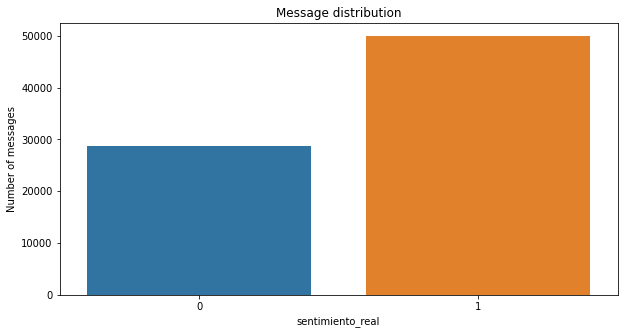

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x="sentimiento_real", data=df)
plt.title("Message distribution")
plt.ylabel("Number of messages")
plt.show()

In [37]:
required_sample = 28707

In [38]:
df_pos = df[df['sentimiento_real'] == 0].sample(n=required_sample, random_state=27)

In [39]:
df_pos['sentimiento_real'].value_counts()

0    28707
Name: sentimiento_real, dtype: int64

In [40]:
df_neg = df[df['sentimiento_real'] == 1].sample(n=required_sample,  random_state=27)

In [41]:
df_neg['sentimiento_real'].value_counts()

1    28707
Name: sentimiento_real, dtype: int64

In [42]:
df = pd.concat([df_pos, df_neg]).sample(frac=1, random_state=27).reset_index(drop=True)

In [43]:
df['sentimiento_real'].value_counts()

0    28707
1    28707
Name: sentimiento_real, dtype: int64

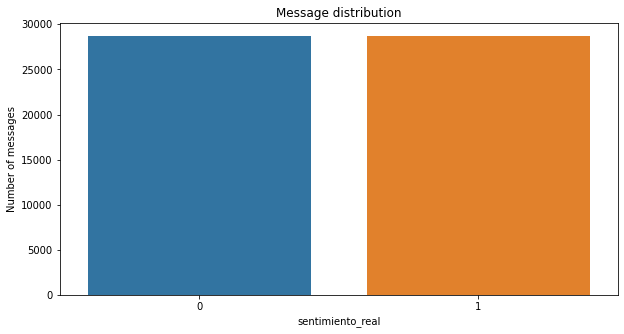

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x="sentimiento_real", data=df)
plt.title("Message distribution")
plt.ylabel("Number of messages")
plt.show()

# Data processing II

## Separate the dataset into dependent and independent variables

In [46]:
X = df['text'].values
y = df['sentimiento_real'].values

## Separate the dataset into training and validation

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27, stratify=y)

## Build vocabulary

In [48]:
# Construction of the dictionary from the training text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [49]:
print("The vocabulary size is: {}".format(len(tokenizer.word_index)))

The vocabulary size is: 58326


In [75]:
# save file with vocabulary
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

## Treatment of training data

### Encode the training sequences

In [50]:
# Change text according to the sequence of values in the dictionary
X_train_ = tokenizer.texts_to_sequences(X_train)
print("Number of words in the sample texts: ({0}, {1})".format(len(X_train_[0]), len(X_train_[1])))

Number of words in the sample texts: (10, 25)


### Define sequence input length

In [51]:
# longest tokenized text in dataset
len(max(X_train_, key = lambda x: len(x)))

316

In [52]:
# length of the first 50 tokenized texts
cases = sorted(list(X_train_), key = lambda x: len(x), reverse=True)
print([len(x) for x in cases[:50]])

[316, 246, 236, 194, 161, 153, 147, 144, 141, 137, 128, 127, 117, 94, 93, 89, 80, 80, 75, 74, 70, 70, 70, 70, 69, 67, 67, 66, 65, 65, 62, 62, 62, 61, 60, 60, 60, 60, 60, 60, 59, 58, 58, 58, 56, 56, 56, 56, 55, 55]


In [53]:
# median of the lengths of the tokenized texts
long_ = [len(x) for x in cases]
print(np.median(long_))

14.0


In [54]:
# Quartile 99.5% of the lengths of the tokenized texts
np.quantile(long_,0.995)

40.0

In [55]:
# makes all sequences(sentences) the same size
X_train_ = pad_sequences(X_train_, 40) 
print("Now the text has a fixed length of 40. \nFirst sentence: \n{0}".format(X_train_[0]))

Now the text has a fixed length of 40. 
First sentence: 
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0  1509 13042    36 15459 13043 27206
    50  2946   221  7066]


### Set shape to training data

In [56]:
X_train_

array([[    0,     0,     0, ...,  2946,   221,  7066],
       [    0,     0,     0, ...,   329,   425, 19465],
       [    0,     0,     0, ...,   610,  1131, 15461],
       ...,
       [    0,     0,     0, ...,   127,    53,   218],
       [    0,     0,     0, ...,   598, 19218,   824],
       [    0,     0,     0, ...,   437,    10,    99]])

In [57]:
X_train_ = X_train_.reshape(X_train_.shape[0],X_train_.shape[1],1)
X_train_

array([[[    0],
        [    0],
        [    0],
        ...,
        [ 2946],
        [  221],
        [ 7066]],

       [[    0],
        [    0],
        [    0],
        ...,
        [  329],
        [  425],
        [19465]],

       [[    0],
        [    0],
        [    0],
        ...,
        [  610],
        [ 1131],
        [15461]],

       ...,

       [[    0],
        [    0],
        [    0],
        ...,
        [  127],
        [   53],
        [  218]],

       [[    0],
        [    0],
        [    0],
        ...,
        [  598],
        [19218],
        [  824]],

       [[    0],
        [    0],
        [    0],
        ...,
        [  437],
        [   10],
        [   99]]])

## Processing of test data

### Encode test sequences

In [58]:
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_ = pad_sequences(X_test_, 40)
X_test_

array([[    0,     0,     0, ...,  1205,   682,   120],
       [    0,     0,     0, ...,   497,   375,    14],
       [    0,     0,     0, ...,     3,    39,  9721],
       ...,
       [    0,     0,     0, ...,   891,    74,  1148],
       [    0,     0,     0, ...,    56, 11540,   990],
       [    0,     0,     0, ...,  3171,  1576, 20120]])

In [59]:
X_test_.reshape(X_test_.shape[0],X_test_.shape[1],1)

array([[[    0],
        [    0],
        [    0],
        ...,
        [ 1205],
        [  682],
        [  120]],

       [[    0],
        [    0],
        [    0],
        ...,
        [  497],
        [  375],
        [   14]],

       [[    0],
        [    0],
        [    0],
        ...,
        [    3],
        [   39],
        [ 9721]],

       ...,

       [[    0],
        [    0],
        [    0],
        ...,
        [  891],
        [   74],
        [ 1148]],

       [[    0],
        [    0],
        [    0],
        ...,
        [   56],
        [11540],
        [  990]],

       [[    0],
        [    0],
        [    0],
        ...,
        [ 3171],
        [ 1576],
        [20120]]])

In [60]:
X_test_ = X_test_.reshape(X_test_.shape[0],X_test_.shape[1],1)
X_test_

array([[[    0],
        [    0],
        [    0],
        ...,
        [ 1205],
        [  682],
        [  120]],

       [[    0],
        [    0],
        [    0],
        ...,
        [  497],
        [  375],
        [   14]],

       [[    0],
        [    0],
        [    0],
        ...,
        [    3],
        [   39],
        [ 9721]],

       ...,

       [[    0],
        [    0],
        [    0],
        ...,
        [  891],
        [   74],
        [ 1148]],

       [[    0],
        [    0],
        [    0],
        ...,
        [   56],
        [11540],
        [  990]],

       [[    0],
        [    0],
        [    0],
        ...,
        [ 3171],
        [ 1576],
        [20120]]])

# Modeling

In [61]:
def predict(model, X_train, y_train, X_test, y_test):
    """allows to calculate all the metrics related to classification models
    
    args: 
    ----------
        model (str): sentence to remove the stopwords
        X_train (array): independent training variables
        y_train (array): training target variable
        X_test (array): independent test variables
        y_test (array): test target variable
    
    return:
    ----------
          - Acurracy of training data
          - First 5 predictions
          - Accuracy of test data
          - Accuracy of test data
          - ROC AUC Score from test data
          - Training data confusion matrix
          - ROC curve
          - Precision-recall curve
    """
    
 
    loss, acc = model.evaluate(X_test_, y_test)
    print("Loss: {0} \nTraining Accuracy: {1}".format(loss, acc))
    print('\n')
    
    predictions = model.predict(X_test).reshape(1,-1)[0]
    predictions = [0 if x < 0.5 else 1 for x in predictions]
    print('Five first Predictions are: {}'.format(predictions[:5]))
    print('Five first Real values are: {}'.format(y_test[:5]))
    print('\n')
    
    acc = accuracy_score(y_test, predictions)
    print('Accuracy Score is: {}'.format(acc))
    print('Precision Score is: {}'.format(precision_score(y_test, predictions)))
    print('ROC AUC Score is: {}'.format(roc_auc_score(y_test, predictions)))
    print('\n')
    
    print(classification_report(y_test, predictions))
    print('\n')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)    
    fig, axes = plt.subplots(1,3, figsize=(20,5))
    sns.heatmap(cm, annot=True, fmt='g', ax=axes[0])
    axes[0].set_title('Confusion Matrix', fontsize=16)

    # ROC curve
    fpr_lr, tpr_lr, _ = roc_curve(y_test, predictions)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    closest_zero = np.argmin(np.abs(fpr_lr - 0.16))
    closest_zero_fpr_lr = fpr_lr[closest_zero]
    closest_zero_tpr_lr = tpr_lr[closest_zero]

    axes[1].set_xlim([-0.01, 1.00])
    axes[1].set_ylim([-0.01, 1.01])
    axes[1].plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    axes[1].plot(closest_zero_fpr_lr, closest_zero_tpr_lr, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    axes[1].set_xlabel('False Positive Rate', fontsize=16)
    axes[1].set_ylabel('True Positive Rate', fontsize=16)
    axes[1].set_title('ROC curve', fontsize=16)
    axes[1].legend(loc='lower right', fontsize=13)
    axes[1].plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    axes[1].set_aspect('equal')    
    
    # Precision recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, predictions)
    closest_zero = np.argmin(np.abs(precision - 0.75))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    
    axes[2].set_xlim([0.0, 1.01])
    axes[2].set_ylim([0.0, 1.01])
    axes[2].plot(precision, recall, label='Precision-Recall Curve')
    axes[2].plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    axes[2].set_title('Precision Recall curve', fontsize=16)
    axes[2].set_xlabel('Precision', fontsize=16)
    axes[2].set_ylabel('Recall', fontsize=16)
    axes[2].set_aspect('equal')    
        
    plt.show()

**Models:**

Different models were developed for this project, starting from the simplest only with simpleRR and Dense layers, later different types of layers were added, varying the units of each one until reaching the one presented below. The final model uses:
- Embedding layer since it allows reducing the dimension of the text and giving context.
- LSTM layer since it can capture long-term dependencies.
- Dropout layer that allows avoiding overfitting.

## Model

In [63]:
# input_dim: size of the vocabulary
vocabulary_size = len(tokenizer.word_index)+1

# output_dim:
wordvec_dim = 200

# input_length: size of the input sentence
sequence_size = 40

In [64]:
# instantiate the sequential type model
model = Sequential()

# add the layers
model.add(Embedding(vocabulary_size, wordvec_dim, trainable=True, input_length=sequence_size))
model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
model.add(LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.15))
model.add(Dense(16))
model.add(Dropout(rate=0.25))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 200)           11665400  
                                                                 
 lstm (LSTM)                 (None, 40, 64)            67840     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11,767,321
Trainable params: 11,767,321
No

In [66]:
modelckeckpoint = ModelCheckpoint("best_model.hdf5", save_best_only=True)
early_stopping = EarlyStopping(monitor="val_loss", patience = 5)

In [68]:
# training
history = model.fit(X_train_, y_train, validation_data=(X_test_, y_test), epochs=10, callbacks= [modelckeckpoint, early_stopping])

Epoch 1/10
1256/1256 [==============================] - 536s 418ms/step - loss: 0.4672 - accuracy: 0.7789 - val_loss: 0.4175 - val_accuracy: 0.8123
Epoch 2/10
1256/1256 [==============================] - 474s 378ms/step - loss: 0.2722 - accuracy: 0.8890 - val_loss: 0.4527 - val_accuracy: 0.8040
Epoch 3/10
1256/1256 [==============================] - 610s 486ms/step - loss: 0.1406 - accuracy: 0.9445 - val_loss: 0.6327 - val_accuracy: 0.7967
Epoch 4/10
1256/1256 [==============================] - 570s 454ms/step - loss: 0.0815 - accuracy: 0.9696 - val_loss: 0.8847 - val_accuracy: 0.7927
Epoch 5/10
1256/1256 [==============================] - 691s 550ms/step - loss: 0.0518 - accuracy: 0.9811 - val_loss: 1.0553 - val_accuracy: 0.7887
Epoch 6/10
1256/1256 [==============================] - 614s 489ms/step - loss: 0.0397 - accuracy: 0.9855 - val_loss: 1.1621 - val_accuracy: 0.7857


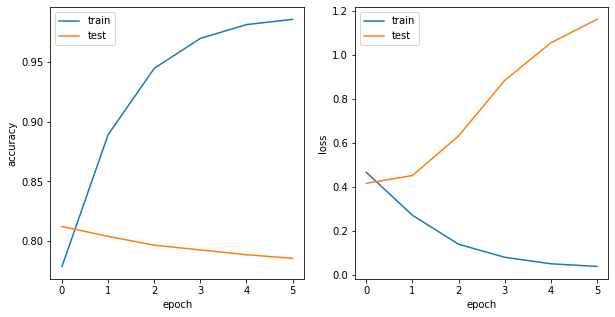

In [69]:
fig, ax= plt.subplots(1,2, figsize=(10,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].legend(['train', 'test'], loc='upper left')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].legend(['train', 'test'], loc='upper left')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')

plt.show()

In [71]:
model = keras.models.load_model('best_model.hdf5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 200)           11665400  
                                                                 
 lstm (LSTM)                 (None, 40, 64)            67840     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11,767,321
Trainable params: 11,767,321
No

539/539 [==============================] - 22s 34ms/step - loss: 0.4175 - accuracy: 0.8123
Loss: 0.41748157143592834 
Training Accuracy: 0.8123077154159546


Five first Predictions are: [1, 1, 0, 0, 1]
Five first Real values are: [1 1 1 0 1]


Accuracy Score is: 0.8123076923076923
Precision Score is: 0.7978959025470653
ROC AUC Score is: 0.8123062862179893


              precision    recall  f1-score   support

           0       0.83      0.79      0.81      8612
           1       0.80      0.84      0.82      8613

    accuracy                           0.81     17225
   macro avg       0.81      0.81      0.81     17225
weighted avg       0.81      0.81      0.81     17225





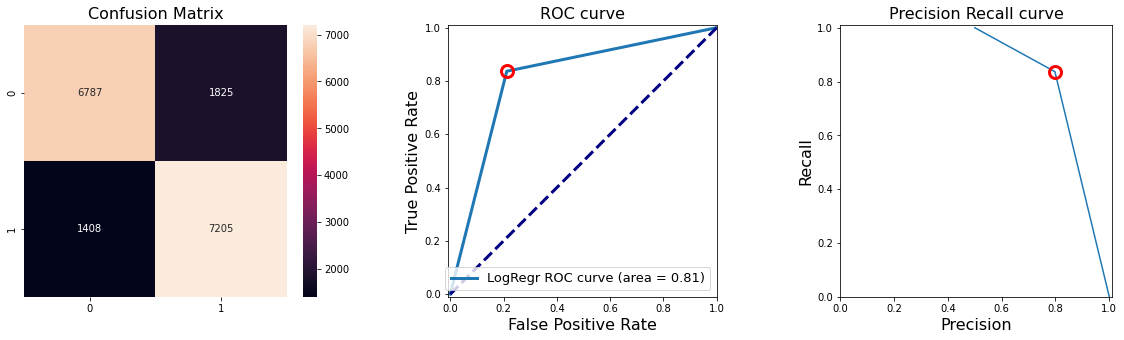

In [72]:
# evaluation
predict(model, X_train_, y_train, X_test_, y_test)

In [73]:
loss, acc = model.evaluate(X_train_, y_train, verbose=0)
print("Loss: {0} \nAccuracy: {1}".format(loss, acc))

Loss: 0.28386858105659485 
Accuracy: 0.8985543251037598


In [74]:
loss, acc = model.evaluate(X_test_, y_test, verbose=0)
print("Loss: {0} \nAccuracy: {1}".format(loss, acc))

Loss: 0.41748157143592834 
Accuracy: 0.8123077154159546
